# Pandas

Pandas is the main library for reading and manipulating data. It is built on top of NumPy and provides an easy-to-use data structure for data analysis. Its used in fields such as machine learning, data science, and data analysis.

In [1]:
# Online version only or if you dont have it
%pip install pandas
# Conda works too
# %conda install pandas

  Using cached pandas-2.2.2-cp310-cp310-macosx_10_9_x86_64.whl.metadata (19 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp310-cp310-macosx_10_9_x86_64.whl (12.6 MB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
%matplotlib widget

In [3]:
import pandas as pd
pd.__version__

'2.2.2'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

One way to create a `Series` is to construct a `Series` object. For example:

In [4]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [5]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [8]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [9]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
'longitude' in california_housing_dataframe.columns

True

In [11]:
california_housing_dataframe.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [12]:
california_housing_dataframe.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16990,-124.22,41.73,28.0,3003.0,699.0,1530.0,653.0,1.7038,78300.0
16991,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0
16992,-124.23,40.81,52.0,1112.0,209.0,544.0,172.0,3.3462,50800.0
16993,-124.23,40.54,52.0,2694.0,453.0,1152.0,435.0,3.0806,106700.0
16994,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


array([[<Axes: title={'center': 'housing_median_age'}>]], dtype=object)

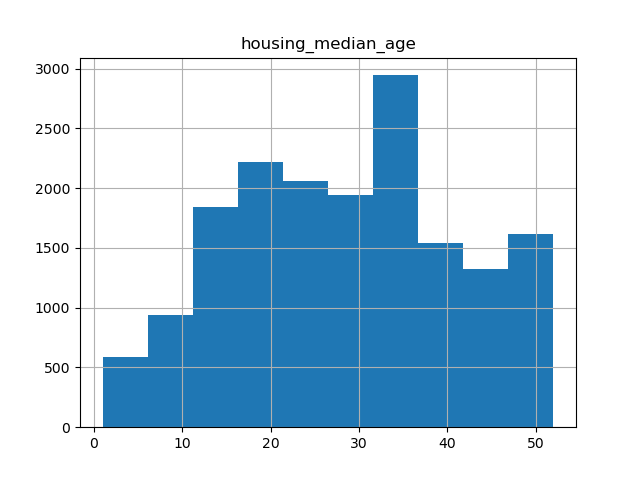

In [13]:
california_housing_dataframe.hist('housing_median_age')

You can also read excel files using read_excel. 

Note: You need to install ``openpyxl`` for this to work

In [15]:
%pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [16]:

df_cuvette = pd.read_excel(
    "../data/Cuvette.xlsx",
    skiprows=2,
)

df_cuvette

,Dilution,v,b,g,y,o,r
0,1,4875,2931,1435,1273,1093,2459
1,2,4948,3844,4572,4797,4217,4561
2,4,5299,4515,7700,8822,7906,6209
3,8,5326,4946,10348,12326,11088,7589
4,16,5331,5069,12031,14532,13314,8208
5,0,5619,5446,14228,17278,15938,9154


In [18]:
pd.read_excel?

Signature:
pd.read_excel(
    io,
    sheet_name: 'str | int | list[IntStrT] | None' = 0,
    *,
    header: 'int | Sequence[int] | None' = 0,
    names: 'SequenceNotStr[Hashable] | range | None' = None,
    index_col: 'int | str | Sequence[int] | None' = None,
    usecols: 'int | str | Sequence[int] | Sequence[str] | Callable[[str], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb', 'calamine'] | None" = None,
    converters: 'dict[str, Callable] | dict[int, Callable] | None' = None,
    true_values: 'Iterable[Hashable] | None' = None,
    false_values: 'Iterable[Hashable] | None' = None,
    skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    parse_dates: 'list | dict | bool' = False,
    date_parser: 'Callable | lib.NoDefault' = <no_default>,
    da

## Accessing Data

You can access `DataFrame` data like a dict/list

In [19]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
cities

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [21]:
cities['Population']

0     852469
1    1015785
2     485199
Name: Population, dtype: int64

In [22]:
cities[1:3]

,City name,Population
1,San Jose,1015785
2,Sacramento,485199


In [23]:
bedrooms = california_housing_dataframe['total_bedrooms']
bedrooms

0        1283.0
1        1901.0
2         174.0
3         337.0
4         326.0
          ...  
16995     394.0
16996     528.0
16997     531.0
16998     552.0
16999     300.0
Name: total_bedrooms, Length: 17000, dtype: float64

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [24]:
population / 1000.0

0     852.469
1    1015.785
2     485.199
dtype: float64

And many numpy operations also work on it too!

In [25]:
import numpy as np
np.log10(population)

0    5.930679
1    6.006802
2    5.685920
dtype: float64

In [26]:
np.sum(bedrooms)

9169984.0

We can also apply more complicated operations using the `apply` method by passing in a function!

Why not try a lambda function?

In [29]:
population.apply(lambda x: x > 500_000)

0     True
1     True
2    False
dtype: bool

Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [30]:
cities

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [31]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


## Exercise #1

Modify the `cities` table by adding a new boolean column called `Wide and saint` that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** The filtering rules previously discussed in the numpy notebook may be useful.

**Note:** strings have a function called `startswith`

**Hint:** "San" in Spanish means "saint."

In [38]:
saint_cities = cities['City name'].apply(lambda x: 'San' in x)
square_miles_fifty = cities['Area square miles'] > 50.0
cities['Wide and saint'] = square_miles_fifty & saint_cities
cities

,City name,Population,Area square miles,Population density,Wide and saint
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


In [45]:
if any((cities['Area square miles'] > 50.0) & (cities['City name'].apply(lambda x: 'San' in x))):
    print('Yay')

Yay


In [55]:
bedrooms.values

array([1283., 1901.,  174., ...,  531.,  552.,  300.])

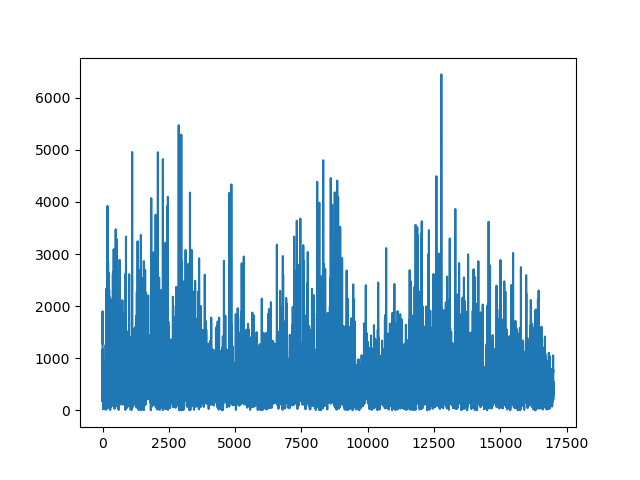

In [51]:
plt.figure()
plt.plot(bedrooms)
plt.show()

## Sorting and indexing

We can sort our california dataframe using `sort_values`

In [62]:
new_df = california_housing_dataframe.sort_values('median_house_value',inplace=False, ascending=True, ignore_index=True)
new_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0
1,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0
3,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0
...,...,...,...,...,...,...,...,...,...
16995,-118.40,33.88,35.0,1060.0,191.0,444.0,196.0,8.0015,500001.0
16996,-118.40,34.06,47.0,3652.0,967.0,1438.0,887.0,3.6964,500001.0
16997,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0
16998,-122.42,37.80,52.0,2797.0,685.0,1156.0,651.0,4.3472,500001.0


In [61]:
california_housing_dataframe.sort_values?

Signature:
california_housing_dataframe.sort_values(
    by: 'IndexLabel',
    *,
    axis: 'Axis' = 0,
    ascending: 'bool | list[bool] | tuple[bool, ...]' = True,
    inplace: 'bool' = False,
    kind: 'SortKind' = 'quicksort',
    na_position: 'str' = 'last',
    ignore_index: 'bool' = False,
    key: 'ValueKeyFunc | None' = None,
) -> 'DataFrame | None'
Docstring:
Sort by the values along either axis.

Parameters
----------
by : str or list of str
    Name or list of names to sort by.

    - if `axis` is 0 or `'index'` then `by` may contain index
      levels and/or column labels.
    - if `axis` is 1 or `'columns'` then `by` may contain column
      levels and/or index labels.
axis : "{0 or 'index', 1 or 'columns'}", default 0
     Axis to be sorted.
ascending : bool or list of bool, default True
     Sort ascending vs. descending. Specify list for multiple sort
     orders.  If this is a list of bools, must match the length of
     the by.
inplace : bool, default False
     If T

#### Difference between loc and iloc

- `.loc` selection is based on the value of the index. For example if the index was categorical we could index via some category. 
- `.iloc` selection is **always** based on integer positions. When using iloc we are treating the dataframe as 2d-array with no special structure compared to the case of `.loc`

In [56]:
california_housing_dataframe.iloc[0]

longitude               -122.0400
latitude                  37.2600
housing_median_age        24.0000
total_rooms             4973.0000
total_bedrooms           709.0000
population              1692.0000
households               696.0000
median_income              7.8627
median_house_value    500001.0000
Name: 14011, dtype: float64

In [57]:
california_housing_dataframe.loc[568]

longitude              -117.02
latitude                 36.40
housing_median_age       19.00
total_rooms             619.00
total_bedrooms          239.00
population              490.00
households              164.00
median_income             2.10
median_house_value    14999.00
Name: 568, dtype: float64

In [58]:
cities.loc[0]

City name             San Francisco
Population                   852469
Area square miles             46.87
Population density     18187.945381
Wide and saint                False
Name: 0, dtype: object

Slicing is valid with `iloc`

In [ ]:
california_housing_dataframe.iloc[:-50:-1]

In [ ]:
#Code here

Lets load a different dataset now:

In [63]:
titanic = pd.read_csv('../data/titanic.csv')
titanic

/Users/ahmed/opt/anaconda3/envs/myenvconda/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/Users/ahmed/opt/anaconda3/envs/myenvconda/lib/python3.10/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/Users/ahmed/opt/anaconda3/envs/myenvconda/lib/python3.10/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Filtering Dataframes

You can filter data based on the columns and values in the dataframe exactly like numpy:

In [64]:
titanic[titanic.Sex == 'male']

/Users/ahmed/opt/anaconda3/envs/myenvconda/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/Users/ahmed/opt/anaconda3/envs/myenvconda/lib/python3.10/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/Users/ahmed/opt/anaconda3/envs/myenvconda/lib/python3.10/site-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


You can also filter for a specific `Series` as well

In [65]:
titanic.Age[titanic.Sex=='male']

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: Age, Length: 577, dtype: float64

Exactly like numpy you can apply the same filtering rules using the same operators (`&`, `|`, `^`, `~`)

In [66]:
titanic.Survived[ (titanic.Sex=='male') & (titanic.Age>=18) ].mean()

/Users/ahmed/opt/anaconda3/envs/myenvconda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


0.17721518987341772

In [67]:
titanic.Survived[(titanic.Sex=='female')&(titanic.Age>=18)].mean()

0.7718446601941747

In [68]:
titanic.Survived[titanic.Pclass == 1].mean()

0.6296296296296297

## Groupby

Groupby allows you to collect the same classes together within a column for example. To perform what we did on all classes of sex as before we can istead do:

In [69]:
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [70]:
titanic.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

You can even group by multiple classes

In [71]:
titanic.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [72]:
titanic[titanic.Age < 18].groupby('Sex')['Survived'].mean()

/Users/ahmed/opt/anaconda3/envs/myenvconda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


Sex
female    0.690909
male      0.396552
Name: Survived, dtype: float64

And if we add another column we can create an entirely new dataframe:

In [73]:
new = titanic.groupby(['Sex','Pclass'])[['Survived','Age']].mean()
new

Survived        Age
Sex    Pclass                     
female 1       0.968085  34.611765
       2       0.921053  28.722973
       3       0.500000  21.750000
male   1       0.368852  41.281386
       2       0.157407  30.740707
       3       0.135447  26.507589

## Exercises

#### What was the average age of the survivors?

#### What was the combined survival rate of both children (age less than 18) and seniors (age greater than 60)?

In [ ]:
# Child rate here

In [ ]:
# Senior rate here

In [ ]:
# Combined rate here

#### Group by pClass and investigate average survival rate, age and fare
